In [1]:
from scipy.io import loadmat
from datetime import datetime
import os


def calc_age(taken, dob):
    birth = datetime.fromordinal(max(int(dob) - 366, 1))

    # assume the photo was taken in the middle of the year
    if birth.month < 7:
        return taken - birth.year
    else:
        return taken - birth.year - 1


def get_meta(mat_path, db):
    meta = loadmat(mat_path)
    full_path = meta[db][0, 0]["full_path"][0]
    dob = meta[db][0, 0]["dob"][0]  # Matlab serial date number
    gender = meta[db][0, 0]["gender"][0]
    photo_taken = meta[db][0, 0]["photo_taken"][0]  # year
    face_score = meta[db][0, 0]["face_score"][0]
    second_face_score = meta[db][0, 0]["second_face_score"][0]
    age = [calc_age(photo_taken[i], dob[i]) for i in range(len(dob))]
    name = meta[db][0, 0]["name"][0]

    return full_path, dob, gender, photo_taken, face_score, second_face_score, age, name


def load_data(mat_path):
    d = loadmat(mat_path)

    return d["image"], d["gender"][0], d["age"][0], d["db"][0], d["img_size"][0, 0], d["min_score"][0, 0]


def mk_dir(dir):
    try:
        os.mkdir( dir )
    except OSError:
        pass

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#db = "wiki"
db = "imdb"
mat_path = "/data/imdb_faces/imdb_crop/imdb.mat".format(db, db)
full_path, dob, gender, photo_taken, face_score, second_face_score, age, name\
    = get_meta(mat_path, db)

In [ ]:
hist = plt.hist(face_score[face_score>0], bins=np.arange(0, 8, 0.2), color='b')
plt.xlabel("face score")

In [ ]:
hist = plt.hist(second_face_score[~np.isnan(second_face_score)], bins=np.arange(0, 8, 0.2), color='b')
plt.xlabel("second face score")

In [ ]:
hist = plt.hist(age, bins=np.arange(0, 100, 2), color='b')
plt.xlabel("age")

In [60]:
cols, rows = 7, 7
img_num = cols * rows
path_root = "/data/imdb_faces/imdb_crop/"


def show_imgs(img_paths, labels = None):
    img_ids = np.random.choice(len(img_paths), img_num, replace=False)
    
    f = plt.figure(figsize=(15,15))
    for i, img_id in enumerate(img_ids):        
        f.add_subplot(rows, cols, i + 1)
        img = Image.open(path_root + str(img_paths[img_id]))
        plt.imshow(np.array(img))
        if(labels[img_id]):
            plt.title(labels[img_id][0])
        plt.axis('off')
    
    plt.show()

# Create gender detection dataset

In [31]:
img_paths = []

for i in range(len(face_score)):
    if face_score[i] > 2 and second_face_score[i] < 2:
        img_paths.append(full_path[i][0])

print("#images with probabily a single face: {}".format(len(img_paths)))

#images with probabily a single face: 58676


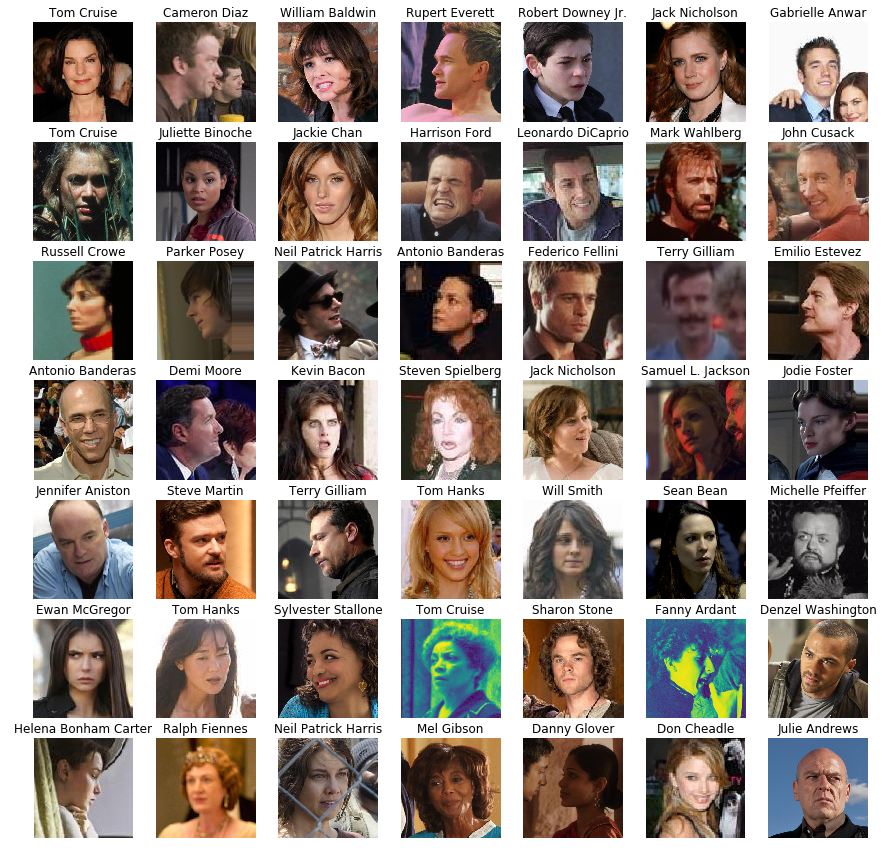

In [61]:
show_imgs(img_paths, name)

In [46]:
male_images = []
male_names = []
female_images = []
female_names = []

for i in range(len(full_path)):
    if face_score[i] > 1 and second_face_score[i] < 3:
        if gender[i] > 0 :
            male_images.append(full_path[i][0])
            male_names.append(name[i])
        else:
            female_images.append(full_path[i][0])
            female_names.append(name[i])


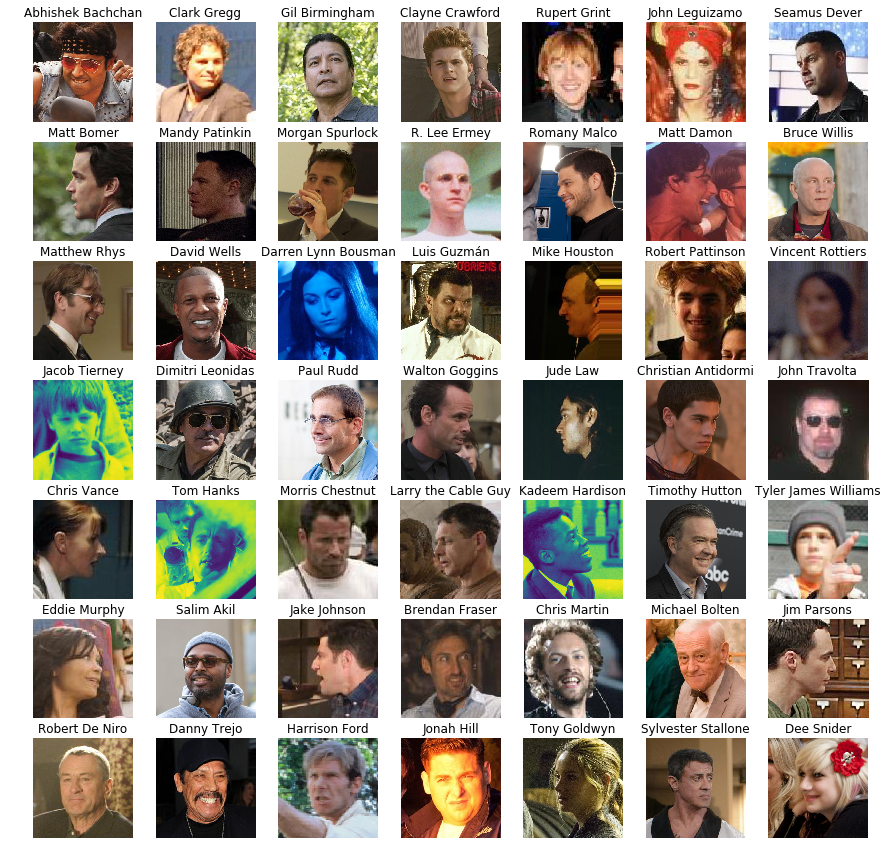

In [62]:
show_imgs(male_images, male_names)

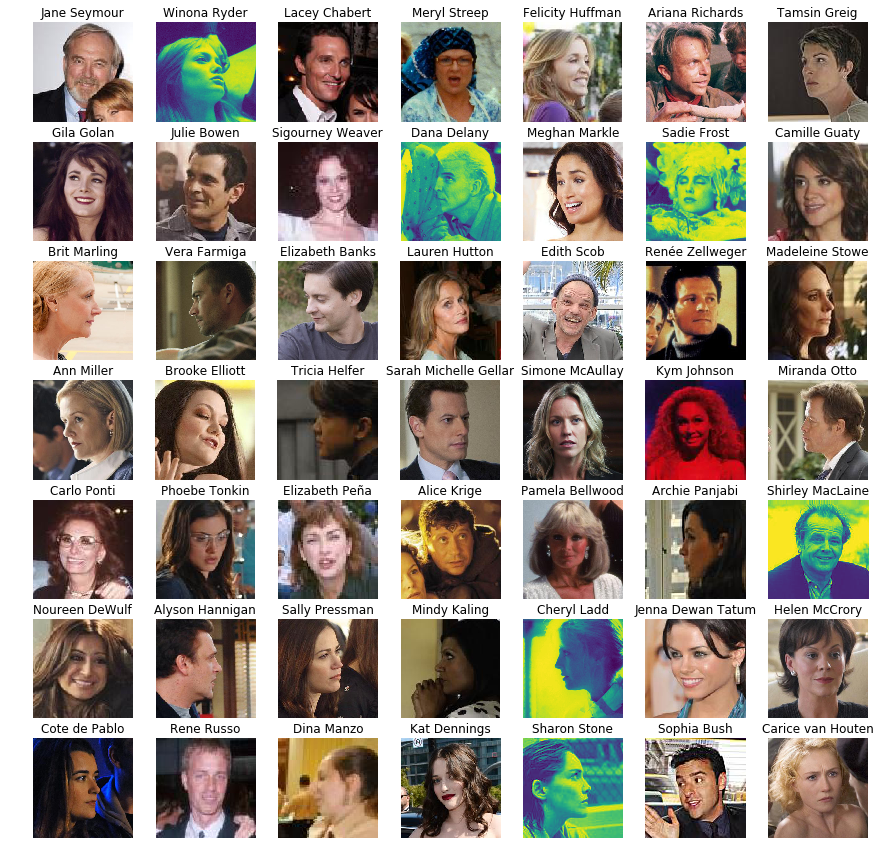

In [63]:
show_imgs(female_images, female_names)

In [44]:
print(len(male_images), len(female_images))

87007 60037


In [6]:
from PIL import Image

['Eric Bana']
male
1.0


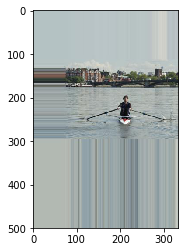

In [27]:
i = np.random.choice(len(full_path), 1, replace=False)[0]
print(name[i])
print('male' if gender[i] > 0.5 else 'female')
print(gender[i])
plt.imshow(Image.open(path_root + str(full_path[i][0])))

In [71]:
import csv

with open("/data/imdb_faces/males.csv", "w") as f:
    writer = csv.writer(f,lineterminator='\n')
    writer.writerows([[str(male_images[i])] for i in range(len(male_images))])
    

with open("/data/imdb_faces/females.csv", "w") as f:
    writer = csv.writer(f,lineterminator='\n')
    writer.writerows([[str(female_images[i])] for i in range(len(female_images))])